In [ ]:

import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Check for missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# Handle missing values with most frequent value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('StudentsPerformance.csv')

# Handle missing values with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
# Apply imputer to the whole dataframe, it handles string and numerical data
df[df.columns] = imputer.fit_transform(df)

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number'])

# Detect and remove outliers using IQR on numeric columns only
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for rows that are NOT outliers in any numeric column
# Use the original dataframe to apply the mask to keep all columns
outlier_mask = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outlier_mask]

# Display the head of the cleaned dataframe (optional)
print(df.head())

# Check the shape after removing outliers
print(df.shape)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math score reading score writing score  
0                    none         72            72            74  
1               completed         69            90            88  
2                    none         90            95            93  
3                    none         47            57            44  
4                    none         76            78            75  
(1000, 8)


In [ ]:
# Encode categorical variables using One-Hot Encoding
df = pd.get_dummies(df)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Check if any numeric columns exist
if numeric_cols:
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("✅ Numeric columns normalized successfully.")
else:
    print("⚠️ No numeric columns found to normalize.")


⚠️ No numeric columns found to normalize.


In [ ]:
# Split data into features and target
X = df.drop(df.columns[-1], axis=1)  # features
y = df[df.columns[-1]]               # target

# Train-Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Basic info and statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 247 entries, gender_female to writing score_100
dtypes: bool(247)
memory usage: 241.3 KB
None
       gender_female gender_male race/ethnicity_group A  \
count           1000        1000                   1000   
unique             2           2                      2   
top             True       False                  False   
freq             518         518                    911   

       race/ethnicity_group B race/ethnicity_group C race/ethnicity_group D  \
count                    1000                   1000                   1000   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                      810                    681                    738   

       race/ethnicity_group E parental level of education_associate's degree  \
count                    1000                       

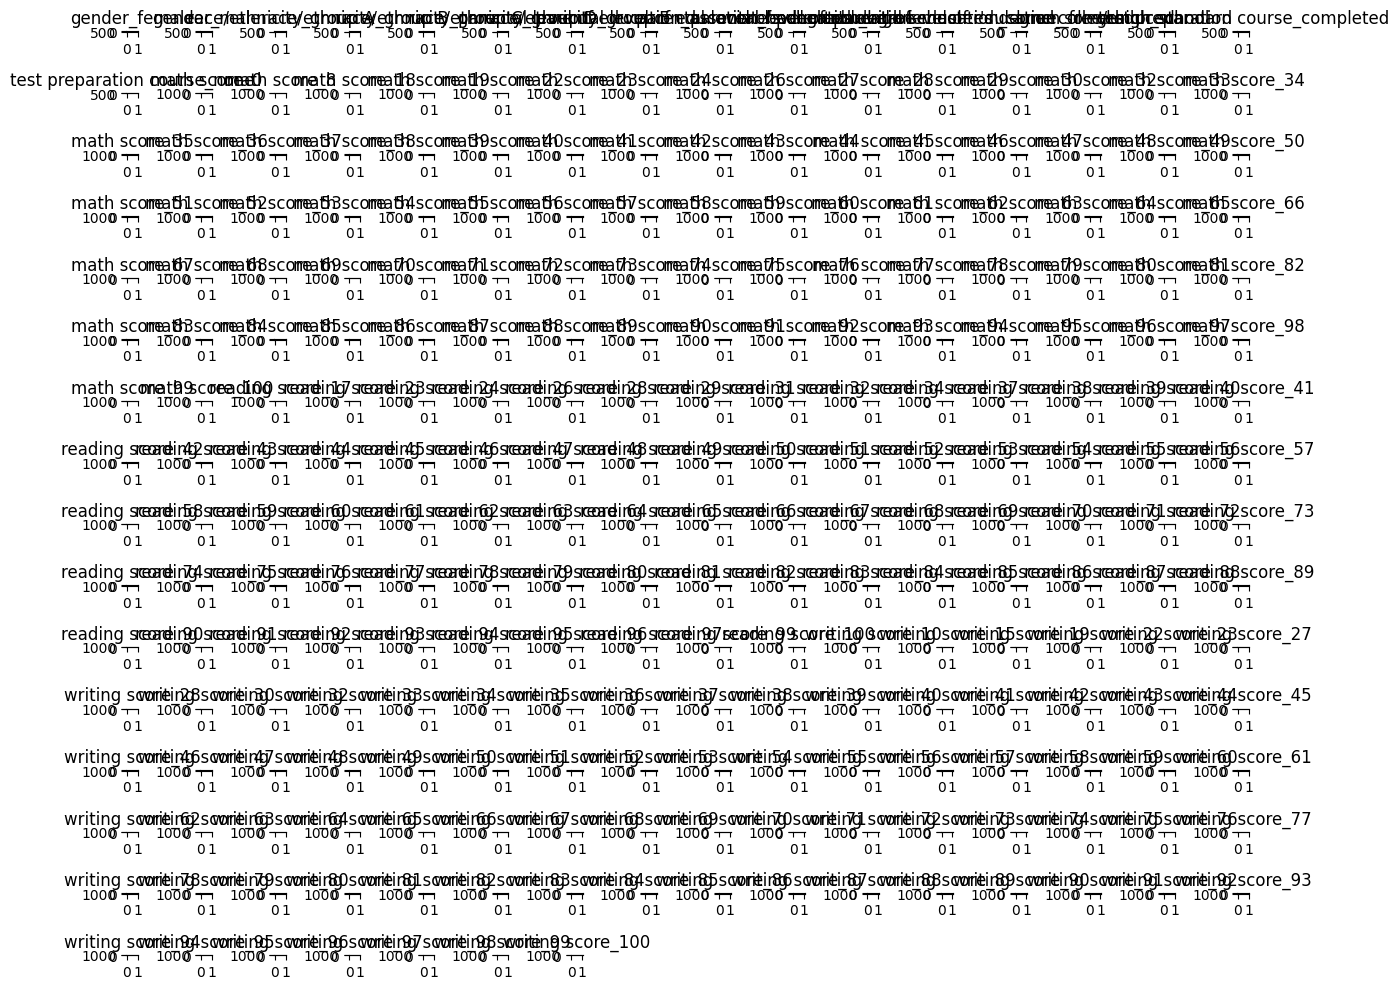

In [ ]:
# Convert all bool and uint8 columns to integers (1/0)
df_cleaned = df.copy()
df_cleaned = df_cleaned.astype({col: 'int' for col in df_cleaned.select_dtypes(include=['bool', 'uint8']).columns})

# Now select numeric columns only
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Plot histograms if numeric columns exist
if not numeric_df.empty:
    numeric_df.hist(figsize=(12, 10))
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No numeric columns available for histogram plotting.")


In [ ]:
# Other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = model.score(X_test, y_test)
    print(f"\n{name} Accuracy: {acc:.2f}")



Decision Tree Accuracy: 0.99

Random Forest Accuracy: 0.99

KNN Accuracy: 0.98

SVM Accuracy: 0.99


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
log_preds = log_model.predict(X_test)

# Logistic Regression Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_preds))
print("Classification Report:")
print(classification_report(y_test, log_preds))

Confusion Matrix:
[[199   0]
 [  1   0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       199
        True       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


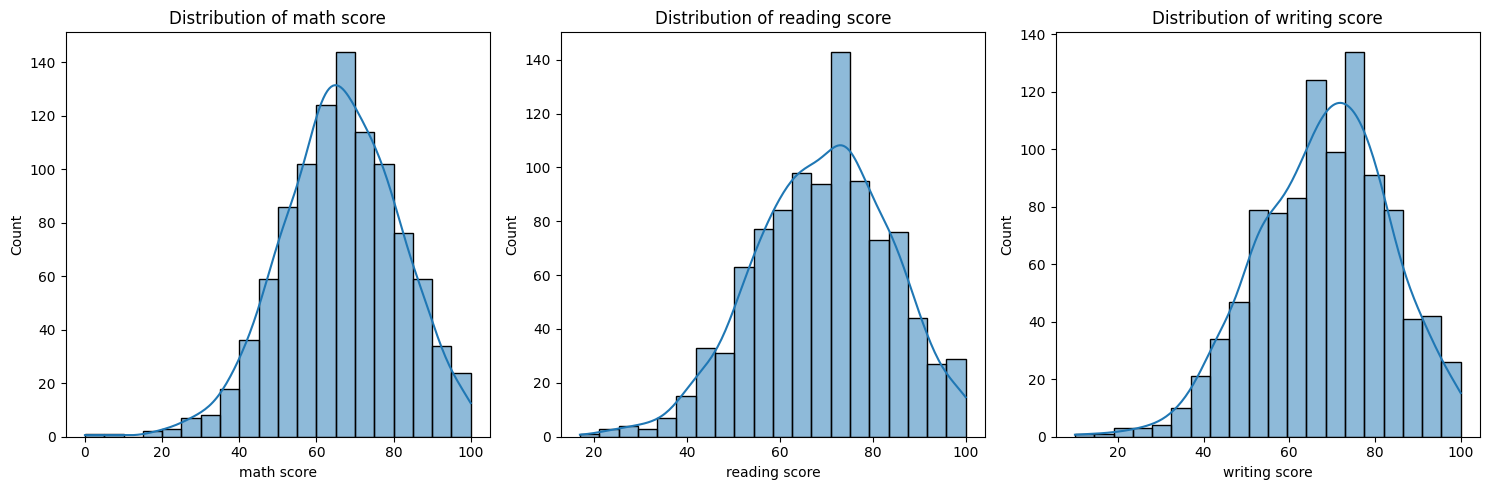

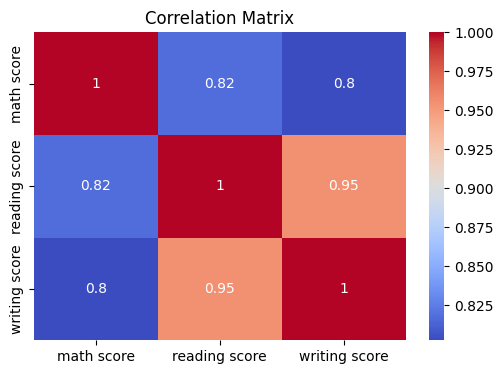

<ipython-input-25-4714e8ea0569>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


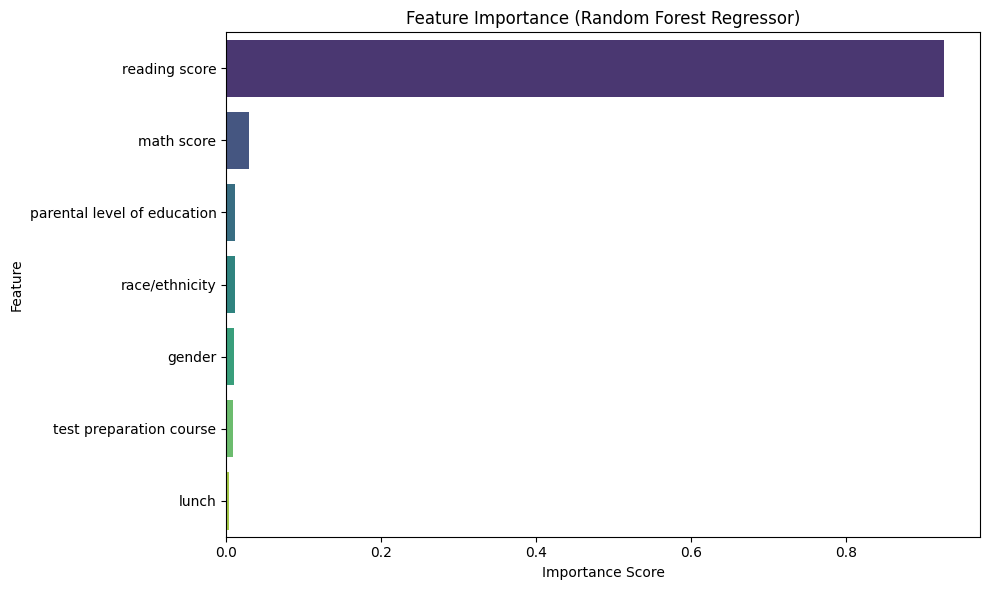

,Feature,Importance
6,reading score,0.926231
5,math score,0.029460
2,parental level of education,0.011978
1,race/ethnicity,0.011015
0,gender,0.009637
4,test preparation course,0.008292
3,lunch,0.003387


In [ ]:

import pandas as pd

# Load the dataset
file_path = "StudentsPerformance.csv"
df = pd.read_csv(file_path)

# Display the first few rows and basic info
df.head(), df.info()



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: EDA - Visualizing distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Step 2: Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Data Encoding
df_encoded = df.copy()
label_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 4: Modeling - Predict writing score using other features
X = df_encoded.drop('writing score', axis=1)
y = df_encoded['writing score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

rmse, r2



from sklearn.ensemble import RandomForestRegressor
importances_dict = {}

# Train a Random Forest model for feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save for display
importances_dict['Random Forest'] = importance_df

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

importance_df


In [ ]:
# Let's assume your dataset has a 'math_score' column
# Convert it into a binary classification: High (1) vs Low (0)
# Use the correct column name 'math score'
threshold = df['math score'].median()  # You can also use a fixed value like 50
df['performance'] = (df['math score'] >= threshold).astype(int)

In [ ]:
# Drop the original target variable to avoid data leakage
# Changed 'math_score' to 'math score'
df = df.drop(['math score'], axis=1)

# Define features and target
X = df.drop('performance', axis=1)
y = df['performance']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)


ValueError: could not convert string to float: 'female'